In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
from bert_model import get_df, load_bert_model, load_metrics

In [8]:
df = get_df()

Connection successful!


In [9]:
df.head(10)

,id,combined_text,verdict
0,1ytxov,i wrote an explanation in til and came off as ...,asshole
1,1yu29c,threw my parent's donuts away my parents are d...,asshole
2,1yu8hi,i told a goth girl she looked like a clown. i ...,not the asshole
3,1yuc78,: argument i had with another redditor in r/himym,everyone sucks
4,1yugsc,aita had a disagreement about les miserables w...,asshole
5,1yux10,i permanently give a customer decaf. his name ...,everyone sucks
6,1yvb3n,"my roommate has many undesirable qualities, bu...",asshole
7,1yvd1v,hockey fan i went to a hockey game at my colle...,not the asshole
8,20wj3x,aita? a conversation on the recent incident wh...,everyone sucks
9,1yvl8z,door to door sales person door to door sales p...,not the asshole


In [4]:
loaded_model = load_bert_model('../final_aita_model.pth')
metrics = load_metrics('../model_metrics.json')

Loaded model: microsoft/deberta-v3-small


c:\Users\bchen\anaconda3\envs\cs439\Lib\site-packages\transformers\convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Loaded metrics


Class Distribution plot

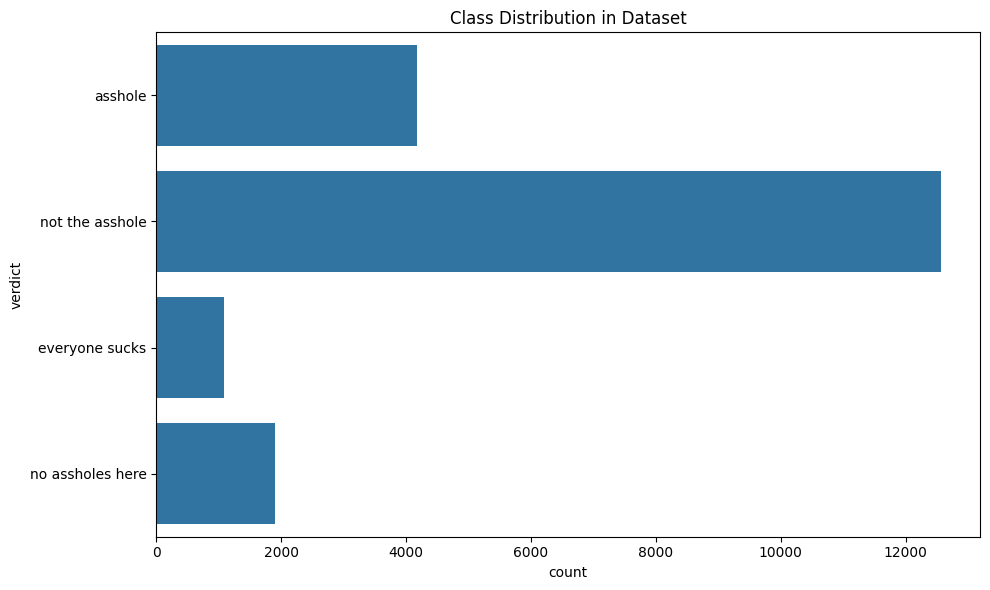

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(y='verdict', data=df)
plt.title('Class Distribution in Dataset')
plt.tight_layout()
plt.show()

Text length analysis

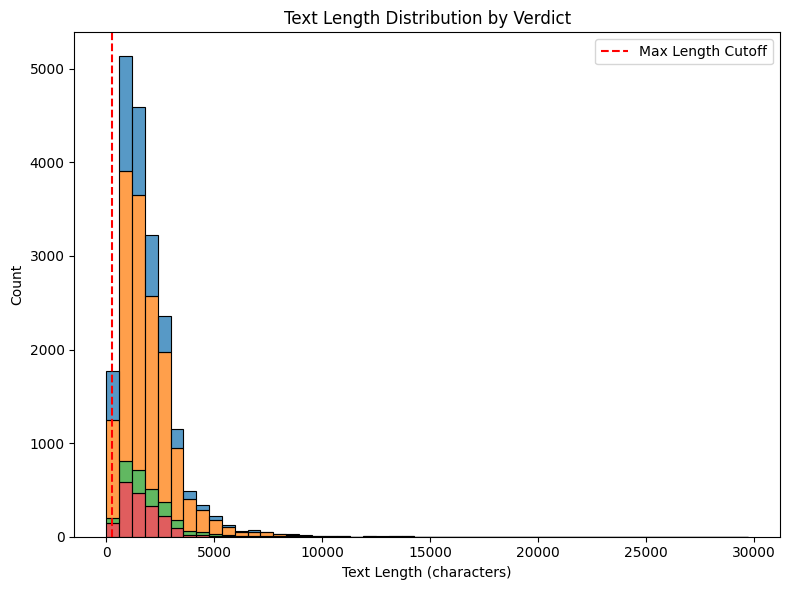

In [12]:
df['text_length'] = df['combined_text'].str.len()
    
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='text_length', hue='verdict', bins=50, multiple='stack')
plt.title('Text Length Distribution by Verdict')
plt.xlabel('Text Length (characters)')
plt.axvline(256, color='red', linestyle='--', label='Max Length Cutoff')
plt.legend()
plt.tight_layout()
plt.show()

Plot Training Metrics

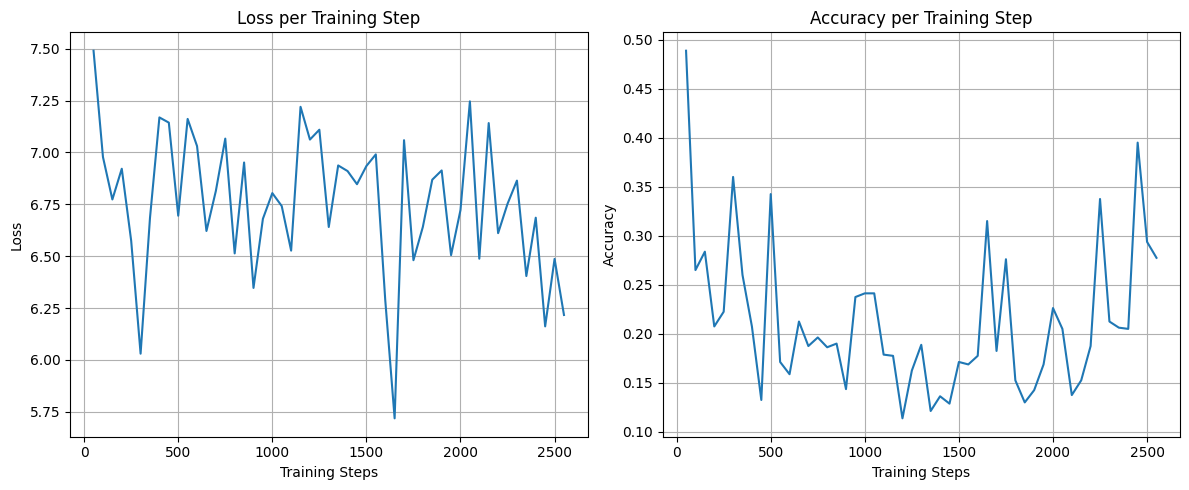

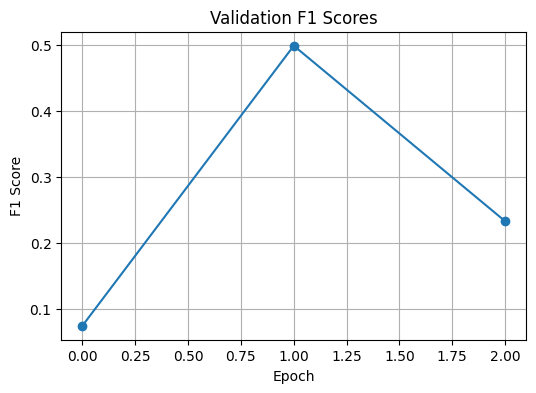

In [5]:
training_metrics = metrics['training_metrics']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(metrics['step_metrics']['steps'], metrics['step_metrics']['losses'])
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss per Training Step')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(metrics['step_metrics']['steps'], metrics['step_metrics']['accuracies'])
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy per Training Step')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot F1 scores
plt.figure(figsize=(6, 4))
plt.plot(training_metrics['val_f1_scores'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Validation F1 Scores')
plt.grid(True)
plt.show()

Plot Confusion Matrix

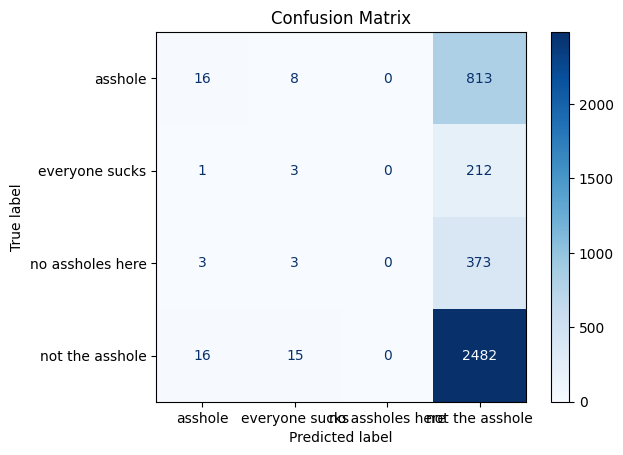

In [6]:
predictions = metrics['predictions']
true_labels = metrics['true_labels']
label_encoder = loaded_model['label_encoder']

cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()